# <center> ANZ Virtual Internship Submission <center>
# <center>By Jayant Jain<center>

##### Importing Basic Libraries

In [1]:
# import necessary modules  
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
df=pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


##### Checking for Null Values and Data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

##### Converting required data into other Dataframe df_salaries

In [4]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [5]:
# Creating another column for salaries
salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
    
df["annual_salary"] = salaries

In [6]:
# Grouping dataframe acc to customer
df_cus = df.groupby("customer_id").mean()
df_cus.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


In [7]:
df_cus.shape

(100, 6)

##### Correlation heatmap to determine which factor affects the Salary most

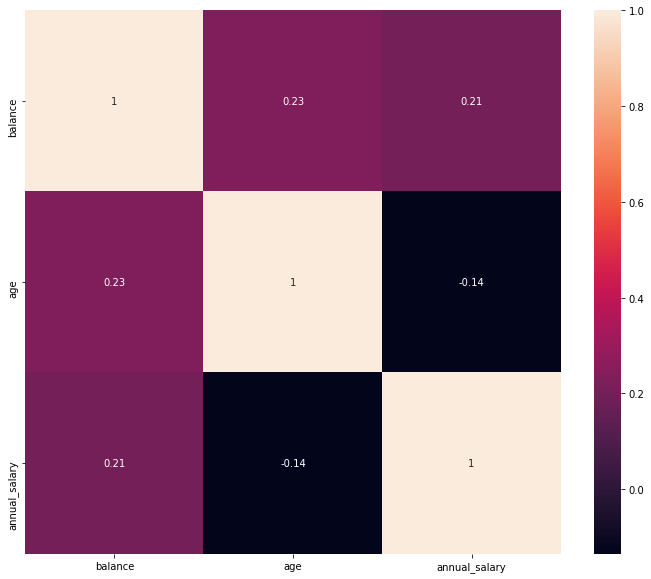

In [8]:
df_cor = df_cus.drop(["card_present_flag","merchant_code","amount"], axis=1)
corr_1 = df_cor.corr()
corr_f = corr_1.index
plt.figure(figsize=(12,10))
#plot heat map
sns.heatmap(df_cor[corr_f].corr(),annot=True)
plt.show()

# Linear Regression Model

In [9]:
n = int(len(df_cus)*0.7)

X_train = df_cus.drop("annual_salary", axis=1).iloc[:n] 
Y_train = df_cus["annual_salary"].iloc[:n]

X_test = df_cus.drop("annual_salary", axis=1).iloc[n:] 
Y_test = df_cus["annual_salary"].iloc[n:]

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [11]:
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train)

0.24688973319615715

In [12]:
lr.predict(X_test)

array([3132.72421023, 2175.39641246, 2098.83496666, 2648.18350248,
       1783.60238994, 2779.34238454, 2709.70361603, 2961.5936652 ,
       2244.52686912, 1665.19124951, 2038.4996552 , 2972.85574737,
       2006.76417873, 1846.04764406, 2291.3211743 , 2156.44498139,
       1879.88463891, 5508.09056187, 1970.1444943 , 2263.4707209 ,
       1764.79270295, 2744.0674848 , 2172.82833702, 3958.85094997,
       2337.95629146, 1839.16986473, 2173.64875609, 1559.47188362,
       1851.43350431, 2570.51455513])

In [13]:
lr.score(X_test, Y_test)

-0.23854072913735003

###### Result- Linear Regression Model Failed Accuracy achieved was in Negative

# Decision Tree - Classification

In [14]:
df_cat = df[["txn_description", "gender", "age", "merchant_state", "movement"]]
df_cat.shape

(12043, 5)

In [15]:
pd.get_dummies(df_cat).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [16]:
n = int(len(df)*0.7)
X_train = pd.get_dummies(df_cat).iloc[:n]
Y_train = df["annual_salary"].iloc[:n]
X_test = pd.get_dummies(df_cat).iloc[n:]
Y_test = df["annual_salary"].iloc[n:]

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf=DecisionTreeClassifier()

In [19]:
clf.fit(X_train, Y_train)
clf.score(X_train, Y_train)

0.7909845788849348

In [20]:
clf.predict(X_test)
clf.score(X_test, Y_test)

0.7550512039856075

In [21]:
y_pred=clf.predict(X_test)
print(y_pred)

[2840 1013  996 ... 4054 1043  996]


#### Regression

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
clf = DecisionTreeRegressor()

In [24]:
clf.fit(X_train, Y_train)
clf.score(X_train, Y_train)

0.7524228033767404

In [25]:
clf.predict(X_test)

array([3649.2       , 1012.4       , 1642.57894737, ..., 3446.625     ,
       1043.        , 1642.57894737])

In [26]:
clf.score(X_test, Y_test)

0.6810304610578963

###### Result- Accuracy of Decision Tree Classification Train Model- 75.55%
###### Result- Accuracy of Decision Tree Regression Test Model- 68.1%